In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
claimants=pd.read_csv("/content/claimants.csv")

In [4]:
claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [13]:
# we need to drop casenum which is not needed and also NA values
claimants.drop(["CASENUM"],inplace=True,axis=1)

KeyError: ignored

In [9]:
claimants.shape

(1340, 6)

In [10]:
claimants # Casenum is dropped

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [14]:
# Lets drop na values
claimants=claimants.dropna()

In [15]:
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1334,1,1.0,1.0,0.0,16.0,0.060
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [16]:
classifier=LogisticRegression()  

In [18]:
# dividing data in input and output variables
x=claimants.iloc[:,1:]
y=claimants.iloc[:,0]

In [20]:
# Lets fit data into logistic model
classifier.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
#predict for x dataset
y_pred=classifier.predict(x)

In [22]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [26]:
# Lets put y_pred in dataframe
y_pred_df=pd.DataFrame({"actual":y,"predicted_probabilities":classifier.predict(x)})
                        

In [27]:
y_pred_df

,actual,predicted_probabilities
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [34]:
# Confusion matrix for model accuracy
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred))

[[381 197]
 [123 395]]


In [31]:
# claculate model accuracy      Formula (a+d)/(a+b+c+d)*100
(381+395)/(381+197+123+395)

0.708029197080292

In [33]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))            # Note here 0 is for atttorney, 1 is for no attorney

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [35]:
# ROC Curve also known as Receiver Operating Characteristic
classifier.predict_proba(x)   # It will give probability of 0 and 1 

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])    #here u will put attorney data and 1 probability from clasifier predict proba

auc=roc_auc_score(y,y_pred)


In [40]:
auc

0.7108589063606365

Text(0, 0.5, 'true positive rate')

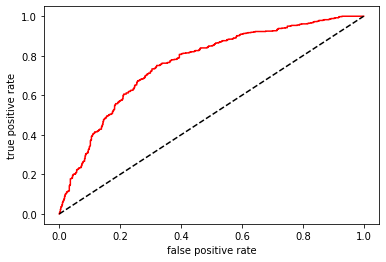

In [45]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color="red",label="logit model (area=%0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")